# 🔍 Overview  

Support Vector Machine (**SVM**) is one of the fundamental algorithms in **machine learning** used for **classification and regression problems**. Unlike Logistic Regression, which models probabilities, SVM is a **supervised learning algorithm** that makes predictions by finding the optimal **hyperplane** to separate different classes in the feature space. It classifies a new data point based on **support vectors** and margin maximization.  

### 💡 **Why use Support Vector Machine?**  
- **Effective in high-dimensional spaces** ✨ no explicit training phase, just store the data.  
- **Flexible** ✨ can be used for both **classification** and **regression** tasks.  
- **Works well with non-linear decision boundaries**.  
- **Handles multi-class classification** naturally.  
- **No assumptions about data distribution** ✨ purely data-driven.  

### ⚡ **Common Applications of Support Vector Machine:**  
- **Image Classification** 📸 (e.g., identifying objects, facial recognition).  
- **Text Classification** 📄 (e.g., spam detection, sentiment analysis).  
- **Bioinformatics** 🌿 (e.g., classifying protein structures, gene expression analysis).  
- **Handwritten Digit Recognition** ✍️ (e.g., OCR systems like digit recognition in postal mail).  
- **Stock Market Prediction** 📈 (e.g., predicting stock trends using historical data).  

# 📌  The Support Vector Machine Formula:

$$  
y = w \cdot x + b  
$$  

Where:  
✔ ( \( y \) ) **(Predicted Value)** → The predicted class (classification) or continuous value (regression) based on the decision boundary.  
✔ ( \( w \) ) **(Weight Vector)** → Defines the direction of the decision boundary.  
✔ ( \( x \) ) **(Feature Vector)** → The input data points in the feature space.  
✔ ( \( b \) ) **(Bias Term)** → Shifts the decision boundary.  
✔ ( \( \phi(x) \) ) **(Kernel Function)** → Maps data into a higher-dimensional space to handle non-linearity.  

⚠️ **Choosing the Right Kernel:**  
- **Linear Kernel** → Works well for linearly separable data.  
- **Polynomial & RBF Kernel** → Helps with complex, non-linearly separable datasets.  

🔑 **Key Insight:**  
- **SVM is a powerful and versatile algorithm** used for **classification and regression**.  
- **Maximizes the margin** between classes for better generalization.  
- **Supports non-linear decision boundaries** using the **kernel trick**.  
- **Robust to overfitting**, especially with proper **regularization**.  
- **Effective in high-dimensional spaces**, making it suitable for complex problems.  

💡 **SVM is widely used for text classification, bioinformatics, and image recognition! 🚀**  

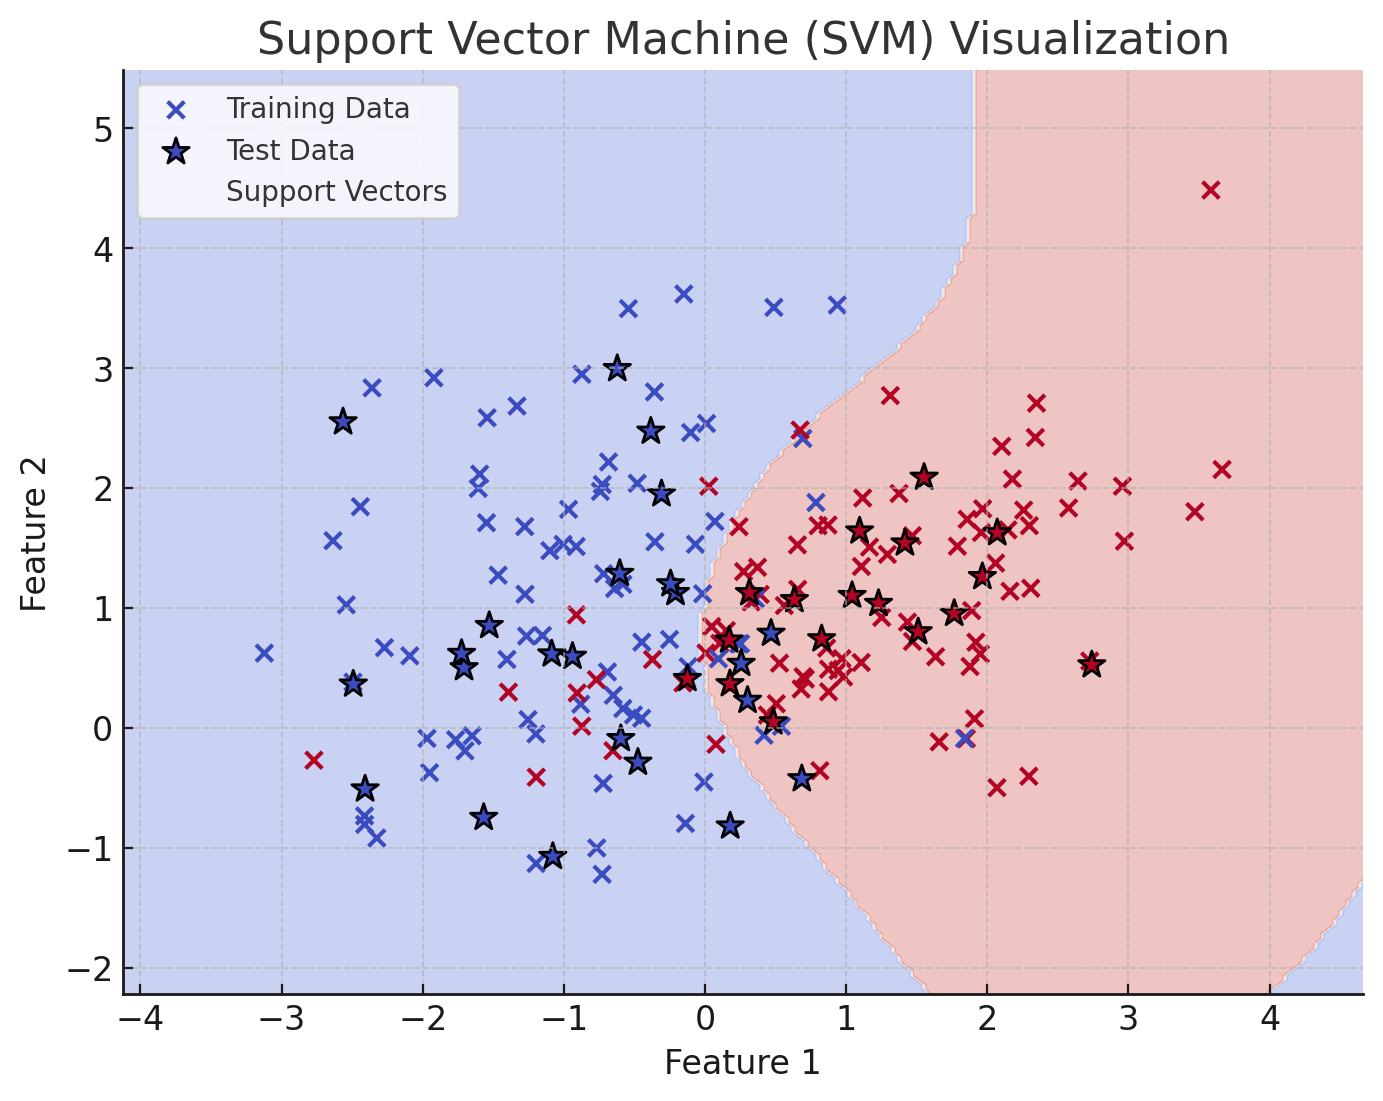# New Section

# 📊  Import necessary libraries




In [25]:
import numpy as np  # 🔢 Numerical operations
import pandas as pd  # 📊 Data handling and processing
import matplotlib.pyplot as plt  # 📈 Visualization
import seaborn as sns  # 🎨 Enhanced visualization
from sklearn.model_selection import train_test_split, cross_val_score  # 🔄 Data splitting & cross-validation
from sklearn.neighbors import KNeighborsClassifier  # 🤖 K-Nearest Neighbors (KNN)
from sklearn.svm import SVC  # 🚀 Support Vector Machine (SVM)
from sklearn.ensemble import RandomForestClassifier  # 🌳 Random Forest Classifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix, roc_curve, auc)  # 📊 Evaluation metrics

# 📌 Load dataset

In [26]:
# 📌 Load dataset
df = pd.read_csv("Social_Network_Ads.csv")  # 📂 Load dataset

# 📌 Split features (X) and target variable (y)

In [27]:
# 📌 Split features (X) and target variable (y)
X = df.iloc[:, :-1].values  # 🔢 Select all columns except the last as features
y = df.iloc[:, -1].values   # 🎯 The last column is the target variable

# 📌 Split the data into training and test sets (80% train / 20% test)

In [28]:
# 📌 Split the data into training and test sets (80% train / 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 🎲 Splitting dataset

# 📌 Define models for comparison (KNN, SVM, Random Forest)


In [29]:
# 📌 Define models for comparison (KNN, SVM, Random Forest)
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),  # 🤖 K-Nearest Neighbors with k=5
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),  # 🚀 Support Vector Machine with RBF kernel
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)  # 🌳 Random Forest with 100 trees
}
# 📌 Dictionary to store model metrics
results = {}
roc_curves = {}

# 📌 Compute ROC Curve

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# 📌 Train models before evaluation
for name, model in models.items():
    model.fit(X_train, y_train)  # 🔥 Train the model on X_train before making predictions

# 📌 Dictionary to store model metrics
results = {}  # Dictionary to store classification performance metrics for each model
roc_curves = {}  # Dictionary to store the ROC curve values (FPR, TPR) for each model

# 🚀 Compute ROC Curve for each model
for name, model in models.items():
    if hasattr(model, "predict_proba"):  # ✅ Check if the model supports probability predictions
        y_prob = model.predict_proba(X_test)[:, 1]  # 🔥 Extract the probability of the positive class (1)
    else:
        y_prob = model.decision_function(X_test)  # 🔥 Use decision_function() for SVM (since it lacks predict_proba)

    # 📊 Compute ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)  # Compute False Positive Rate (FPR) and True Positive Rate (TPR)
    roc_auc = roc_auc_score(y_test, y_prob)  # Compute the Area Under the ROC Curve (AUC-ROC)

    # 📌 Save results
    roc_curves[name] = (fpr, tpr)  # Store the FPR and TPR values for each model
    results[name] = {
        "Accuracy": accuracy_score(y_test, model.predict(X_test)),  # Compute accuracy of the model
        "Precision": precision_score(y_test, model.predict(X_test)),  # Compute precision (Positive Predictive Value)
        "Recall": recall_score(y_test, model.predict(X_test)),  # Compute recall (Sensitivity / True Positive Rate)
        "F1-score": f1_score(y_test, model.predict(X_test)),  # Compute F1-score (harmonic mean of Precision & Recall)
        "ROC-AUC": roc_auc  # Store the ROC-AUC score for performance evaluation
    }

# 📊 Convert results to DataFrame
metrics_df = pd.DataFrame(results).T  # Transpose the DataFrame for better readability
metrics_df.index.name = "Model"  # Set index name to "Model" for clarity

# 🔥 Print evaluation metrics
print("\n📊 Classification Evaluation Metrics:\n")  # Print a heading for better visualization
print(metrics_df.to_string())  # Print the DataFrame as a readable table


📊 Classification Evaluation Metrics:

               Accuracy  Precision    Recall  F1-score   ROC-AUC
Model                                                           
KNN              0.8250   0.769231  0.714286  0.740741  0.871566
SVM              0.7375   0.769231  0.357143  0.487805  0.813874
Random Forest    0.9000   0.812500  0.928571  0.866667  0.945398


# 🔥  CROSS-VALIDATION (CV)

In [31]:
# 📌 CROSS-VALIDATION (CV)
cv_results = {}
cv_folds = 10  # 🔧 Adjustable CV folds
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='accuracy')
    avg_score = np.mean(scores)
    cv_results[name] = avg_score
    print(f"📊 Cross-Validation Accuracy for {name}: {avg_score:.4f}")

📊 Cross-Validation Accuracy for KNN: 0.8125
📊 Cross-Validation Accuracy for SVM: 0.7844
📊 Cross-Validation Accuracy for Random Forest: 0.8781


# 📌 Convert cross-validation results to DataFrame

In [32]:
# 📌 Convert CV results to DataFrame
cv_df = pd.DataFrame(cv_results.items(), columns=["Model", "CV Accuracy"])
print("\n📊 Cross-Validation Results:\n")
print(cv_df.to_string(index=False))



📊 Cross-Validation Results:

        Model  CV Accuracy
          KNN     0.812500
          SVM     0.784375
Random Forest     0.878125


# 🎨 Plot ROC Curve

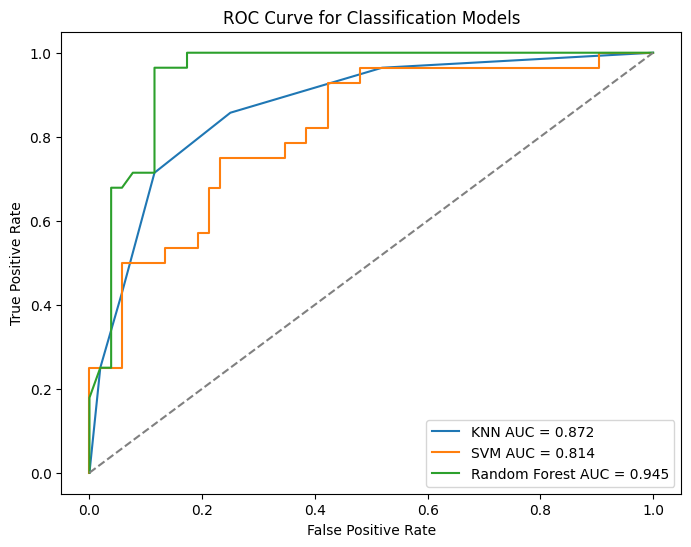

In [33]:
# 🎨 Plot ROC Curve
plt.figure(figsize=(8, 6))
for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name} AUC = {roc_auc_score(y_test, models[name].predict_proba(X_test)[:,1]):.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Classification Models")
plt.legend()
plt.show()


# 🔥 Display evaluation table

In [34]:
# 🔥 Display evaluation table
print("\n📊 Classification Evaluation Metrics:\n")
print(metrics_df.to_string())  # Print DataFrame in a readable format


📊 Classification Evaluation Metrics:

               Accuracy  Precision    Recall  F1-score   ROC-AUC
Model                                                           
KNN              0.8250   0.769231  0.714286  0.740741  0.871566
SVM              0.7375   0.769231  0.357143  0.487805  0.813874
Random Forest    0.9000   0.812500  0.928571  0.866667  0.945398


#🎨 Decision Boundaries

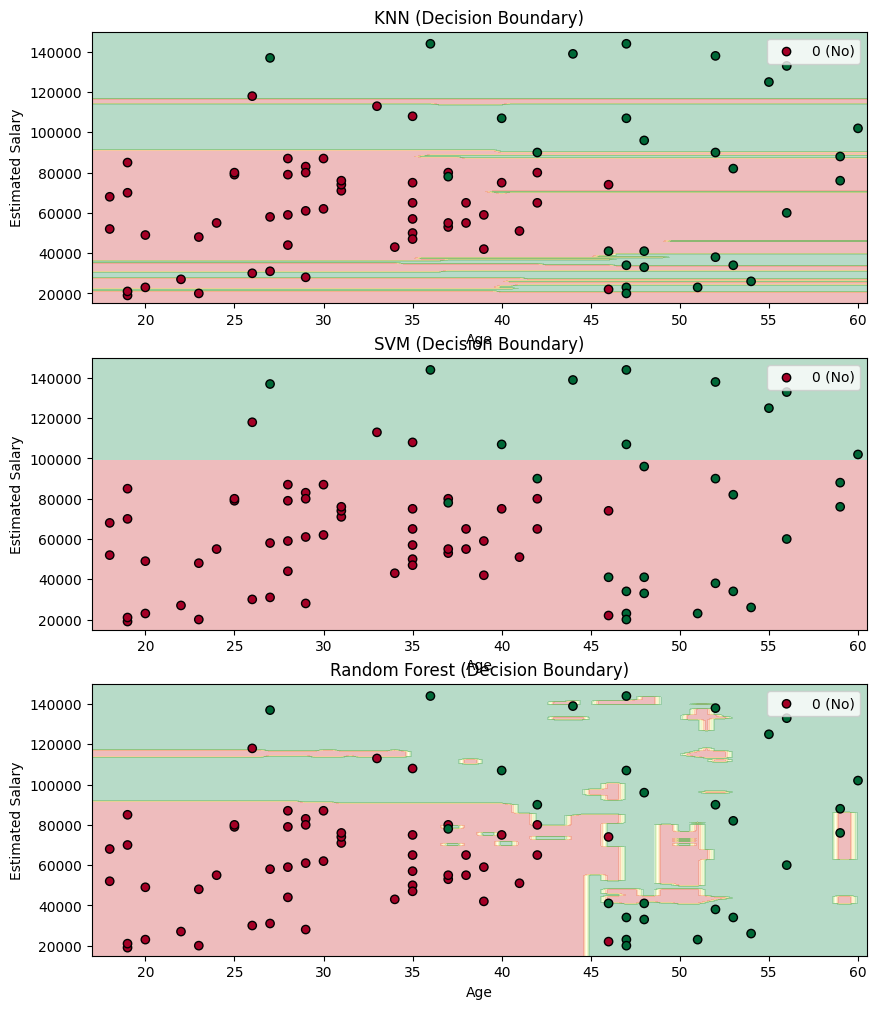


📊 Classification Evaluation Metrics:

               Accuracy  Precision    Recall  F1-score   ROC-AUC
Model                                                           
KNN              0.8250   0.769231  0.714286  0.740741  0.871566
SVM              0.7375   0.769231  0.357143  0.487805  0.813874
Random Forest    0.9000   0.812500  0.928571  0.866667  0.945398


In [35]:
# 🎨 Decision Boundaries
plt.figure(figsize=(10, 12))
for i, (name, model) in enumerate(models.items()):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                         np.arange(y_min, y_max, 500))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(len(models), 1, i+1)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlGn')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlGn', edgecolors='black')
    plt.xlabel("Age")
    plt.ylabel("Estimated Salary")
    plt.title(f"{name} (Decision Boundary)")
    plt.legend(["0 (No)", "1 (Yes)"])

plt.show()

# 🔥 Display Evaluation Metrics
print("\n📊 Classification Evaluation Metrics:\n")
print(metrics_df.to_string())